# Week 3 - Univariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson: Bar charts and univariate graphs

Let's make a dataset (in this case, just a series) which is weighted to have more small values than large values.  By squaring a random number between 0 and 1, we ensure that half (those whose initial value is below 0.5) are below 0.25, while the other half are between 0.25 and 1.  This means that most of the values are small, and it's more interesting than analyzing a perfectly uniform dataset.  This kind of trick - transforming one random variable to get another - can generate a variety of random datasets for you.  We then multiply by 100 to get a number between 0 and 100.

In [2]:
np.random.seed(0)
lesson_series = np.round(np.random.random(size = 1000)**2 * 100, 2)
lesson_series[0:10] # check the first ten values.  Are they mostly on the small side?

array([30.12, 51.15, 36.33, 29.69, 17.95, 41.72, 19.15, 79.53, 92.86,
       14.7 ])

In [3]:
import seaborn as sns

In the plot below, you can see a histogram of the values in the series.  For some reason, it decided to have exactly 11 bins (we allowed it to choose the number of bins.)  Most values - about 300 of them - are between 0 and 9, and the next most likely bin is between 9 and 18.  Since there are 1000 values, the total of the bars should be 1000.

<Axes: ylabel='Count'>

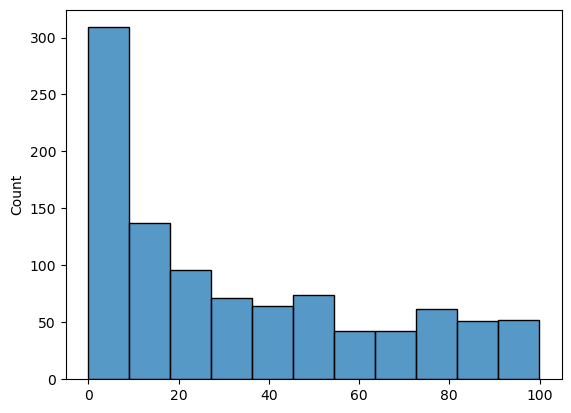

In [4]:
sns.histplot(lesson_series)

There are 11 bins or bars, a number which by default is chosen by seaborn.  We can reproduce this manually to (hopefully) see the same values as numbers. I'm not sure that this second histogram is guaranteed to be exactly the same, but it looks the same to me:

In [5]:
np.histogram(lesson_series, bins = 11)[0]

array([309, 137,  96,  71,  64,  74,  42,  42,  62,  51,  52])

What happens if we override seaborn and choose the number of bins ourselves?  We could choose a much larger number of bins:

<Axes: ylabel='Count'>

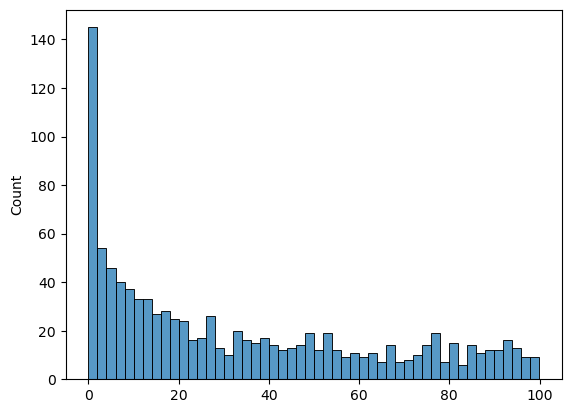

In [6]:
sns.histplot(lesson_series, bins = 50)

One disadvantage of this 50 bin picture is that the outliers are worse.  That is, the graph wobbles up and down a bit more randomly.  That's because there are fewer values in each bin, so there's more of a role for chance to take effect.  If we had many more data points and/or fewer bins, we could get rid of this wobble.

<Axes: ylabel='Count'>

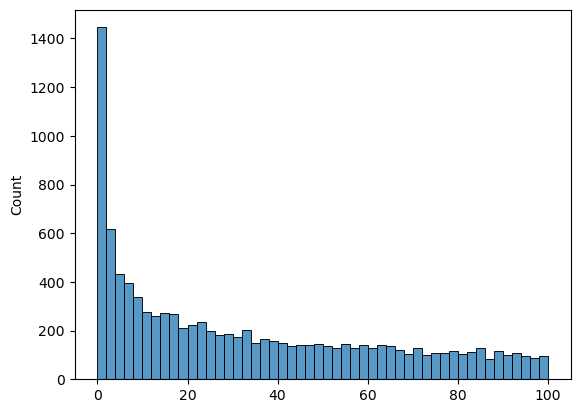

In [7]:
lesson_series_2 = np.round(np.random.random(size = 10000)**2 * 100, 2)
sns.histplot(lesson_series_2, bins = 50)

Here you can see that because the number of bins is the same as in the second graph above, but for more data, the histogram is a smoother graph.  Why does more data make for a smoother graph?  Something for you to think about.  I said it's because a larger number of data points in each bin reduces the role of chance - but why is that?

Here is a KDE (Kernel Density Estimate) plot.  It's just the same histogram, but drawn smoothly.  The KDE plot doesn't have a "number of bins."  It's always drawn the same way.  In this case, because of the smoothness of the curve, it seems that x-values less then zero and above 100 are still plotted, even though there were no such values in the dataset.  This seems like a drawback of the KDE plot, especially if the viewer is unprepared for this aspect of the plot.

<Axes: ylabel='Density'>

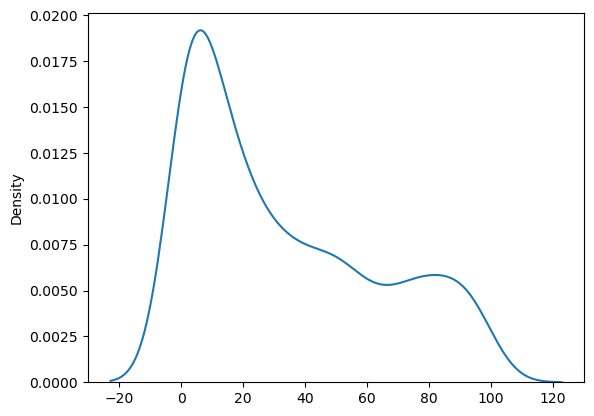

In [8]:
sns.kdeplot(lesson_series)

We could also draw a box plot.  This time, to construct the data I used a fourth power rather than squaring, with only 100 data points, so that the points are even more concentrated toward the small numbers.  It turns out that this will create a more interesting boxplot.  The top and bottom edges of the box are the 75th and 25th percentile, respectively, and the top and bottom "whiskers" show a larger range which is a multiple of 1.5 times the the box height.  (The bottom whisker cannot be see because it's pushed against the bottom of the graph.)  The filled-in box shows that half of the values are between about 0 and 30 on the y-axis.  Is that what you'd expect?  The 25th and 75th percentile of the original uniform random variable are at 0.25 and 0.75.  Taken to the fourth power and multiplied by 100 (remember, that's how we constructed our sample), that's 0.25\*\*4 * 100 = 0.4 and 0.75\*\*4 * 100 = 32.  It's plausible that those are the height of the bottom and top of the box.  We can see that a small number of samples are above the top whisker; they are shown as individual dots.

<Axes: >

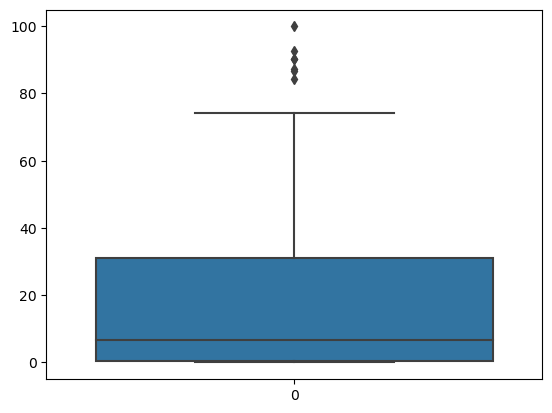

In [9]:
lesson_series_3 = np.round(np.random.random(size = 100)**4 * 100, 2)
sns.boxplot(lesson_series_3)

If we go back to the original lesson_series with the squared values, there will be two whiskers, because it isn't so strongly weighted toward small values:

<Axes: >

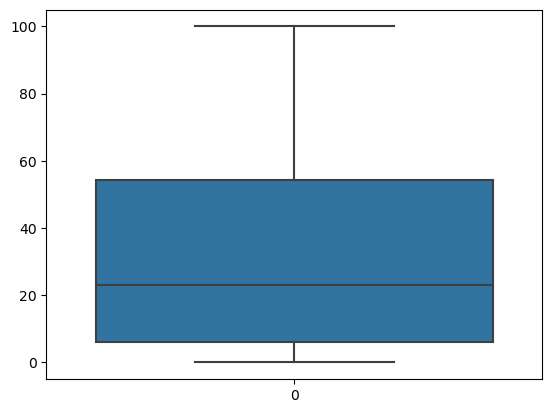

In [10]:
sns.boxplot(lesson_series)

Going back to the fourth power series, another histogram variant is the violin plot.  This simply combines a kde plot (turned on its side and forming two side of the violin) with a boxplot:

<Axes: >

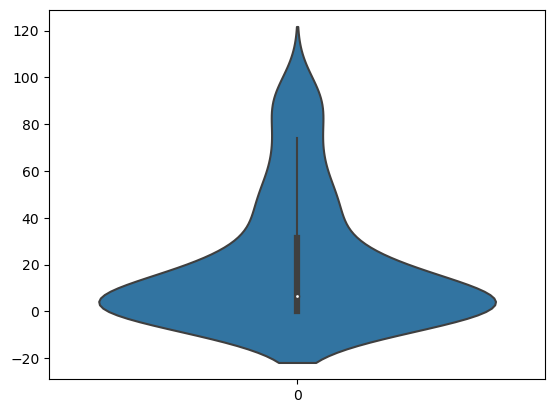

In [11]:
sns.violinplot(lesson_series_3)

Finally, a swarm plot shows the histogram (turned on its side and doubled, as with the violin plot) but showing each individual point.

<Axes: >

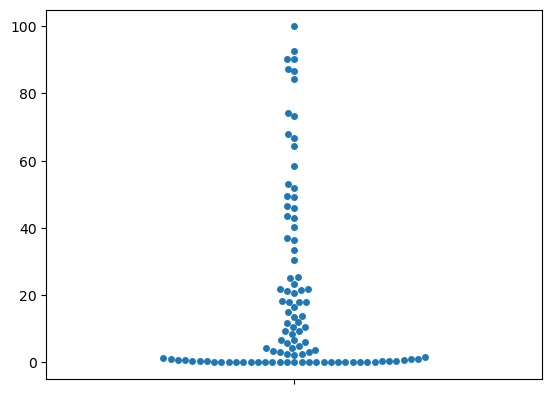

In [12]:
sns.swarmplot(lesson_series_3)

# 2. Weekly graph question

Below are a histogram and table representation of the same data.  A species of bird is being analyzed, and each individual's body length in inches has been measured.

Please write a short explanation of the pros and cons of these two representations.  Which would you choose?  How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [13]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 10000
data = np.random.normal(size = num_data) + 6
df = pd.DataFrame(data.T, columns = ["data"])

In [14]:
histnums = np.histogram(df["data"])
histcounts = histnums[0]
histmins = histnums[1][0:-1]
histmaxes = histnums[1][1:]

In [15]:
pd.DataFrame(np.array([histcounts, histmins, histmaxes]).T, columns = ["count", "minval", "maxval"])

,count,minval,maxval
0,10.0,2.259899,3.014075
1,110.0,3.014075,3.768252
2,579.0,3.768252,4.522428
3,1710.0,4.522428,5.276604
4,2833.0,5.276604,6.030780
5,2688.0,6.030780,6.784956
6,1479.0,6.784956,7.539132
7,487.0,7.539132,8.293308
8,97.0,8.293308,9.047484
9,7.0,9.047484,9.801660


<Axes: ylabel='Frequency'>

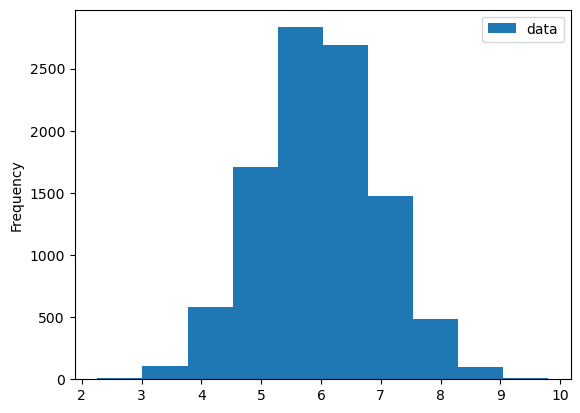

In [16]:
df.plot.hist()

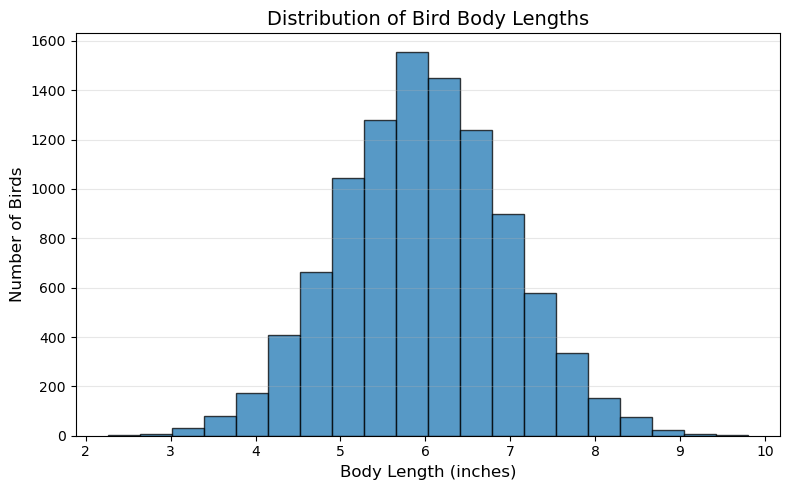

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.hist(
    df["data"],
    bins=20,              # balanced detail
    edgecolor="black",
    alpha=0.75
)

plt.title("Distribution of Bird Body Lengths", fontsize=14)
plt.xlabel("Body Length (inches)", fontsize=12)
plt.ylabel("Number of Birds", fontsize=12)

plt.grid(axis="y", alpha=0.3)  # subtle guide for reading values
plt.tight_layout()
plt.show()

The histogram and table display the same bird body-length data but serve different purposes. The histogram is effective for quickly understanding the overall distribution, 
making it easy to see where most birds fall and whether the data is skewed or evenly spread. However, histograms sacrifice precision, since exact values and 
counts within each range are not directly shown and can vary depending on bin choices. 

The table provides exact numerical detail, including precise ranges and counts, 
but patterns are harder to recognize and require more effort to interpret. For understanding body-length variation in a species, the histogram is the better choice because it communicates insights more efficiently. To improve clarity, I would add clear axis labels with units, a meaningful title, and an appropriate number of bins to balance detail and readability.

# 3. Homework - Amusement Park Rides

Now let's imagine we have some data about how many times different visitors to an amusement park used each ride, as well as how much money they spend at the amusement park.  Each sample represents a single visit by a single visitor on a given date.

In [18]:
num_visits = 10000
np.random.seed(0)

In [19]:
df = pd.DataFrame(columns = ["VisitDate"])

In [20]:
start = datetime(2010, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_visits)
s = start + pd.to_timedelta(random_days, unit='D')
s = s.sort_values()
df["VisitDate"] = s

In [21]:
df["IsAdult"] = np.random.choice([True, True, False], size = num_visits)

In [22]:
df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size = num_visits) * df["IsAdult"]

In [23]:
df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size = num_visits) * ~df["IsAdult"]

In [24]:
df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size = num_visits) * df["IsAdult"] + np.random.randint(1, 5, size = num_visits) * ~df["IsAdult"]

In [25]:
df["MoneySpent"] = np.round(np.random.random(size = num_visits)**2 * 100, 2)

In [26]:
df.iloc[0:5]
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   VisitDate    10000 non-null  datetime64[ns]
 1   IsAdult      10000 non-null  bool          
 2   MartianRide  10000 non-null  int64         
 3   TeacupRide   10000 non-null  int64         
 4   RiverRide    10000 non-null  int64         
 5   MoneySpent   10000 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 400.5 KB


,MartianRide,TeacupRide,RiverRide,MoneySpent
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.907300,0.586200,1.200700,33.358265
std,2.077339,1.232851,1.295757,29.657410
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.170000
50%,0.000000,0.000000,1.000000,25.270000
75%,1.000000,1.000000,2.000000,56.092500
max,10.000000,5.000000,4.000000,99.990000


1. Find the mean, median, and mode for how many times visitors rode each ride.  See Week 1 for Google advice on this.

In [27]:
ride_cols = ["MartianRide", "TeacupRide", "RiverRide"]

summary_stats = pd.DataFrame({
    "Mean": df[ride_cols].mean(),
    "Median": df[ride_cols].median(),
    "Mode": df[ride_cols].mode().iloc[0]
})

print("\nSummary Statistics:")
display(summary_stats)


Summary Statistics:


,Mean,Median,Mode
MartianRide,0.9073,0.0,0
TeacupRide,0.5862,0.0,0
RiverRide,1.2007,1.0,0


2. Use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.

Suggested Google search or ChatGPT prompt: 
I first tried: "How do I use groupby to find the mean over each day in my DataFrame?" but Google didn't help me.

Then I tried: "How do I find the mean over each date in a dataframe?"  Sometimes, you have to try multiple searches.

This gives me a very helpful site, where someone is doing the same thing we are:

https://stackoverflow.com/questions/40788530/how-to-calculate-mean-of-some-rows-for-each-given-date-in-a-dataframe

In [28]:
import numpy as np

df["VisitDate"] = pd.to_datetime(df["VisitDate"])


ride_cols = ["MartianRide", "TeacupRide", "RiverRide"]

daily_summary = (
    df.groupby("VisitDate")[ride_cols]
      .agg(["mean", "median", lambda x: x.mode().iloc[0]])
)

display(daily_summary)

MartianRide                   TeacupRide                    \
                  mean median <lambda_0>       mean median <lambda_0>   
VisitDate                                                               
2010-01-01        0.75    0.0          0       0.25    0.0          0   
2010-01-02        0.00    0.0          0       1.00    1.0          1   
2010-01-03        0.00    0.0          0       1.50    0.5          0   
2010-01-04        0.00    0.0          0       0.00    0.0          0   
2010-01-05        0.50    0.5          0       0.00    0.0          0   
...                ...    ...        ...        ...    ...        ...   
2023-12-27        0.50    0.5          0       0.50    0.5          0   
2023-12-28        6.00    6.0          2       0.00    0.0          0   
2023-12-29        0.00    0.0          0       1.00    1.0          1   
2023-12-30        3.00    3.0          3       0.00    0.0          0   
2023-12-31        0.00    0.0          0       0.00    0.0          0   

           RiverRide                    
                mean median <lambda_0>  
VisitDate                               
2010-01-01      1.25    0.5          0  
2010-01-02      2.00    2.0          2  
2010-01-03      1.25    0.5          0  
2010-01-04      1.00    1.0          1  
2010-01-05      0.00    0.0          0  
...              ...    ...        ...  
2023-12-27      1.00    1.0          0  
2023-12-28      0.00    0.0          0  
2023-12-29      3.00    3.0          3  
2023-12-30      1.00    1.0          1  
2023-12-31      1.00    1.0          1  

[4404 rows x 9 columns]

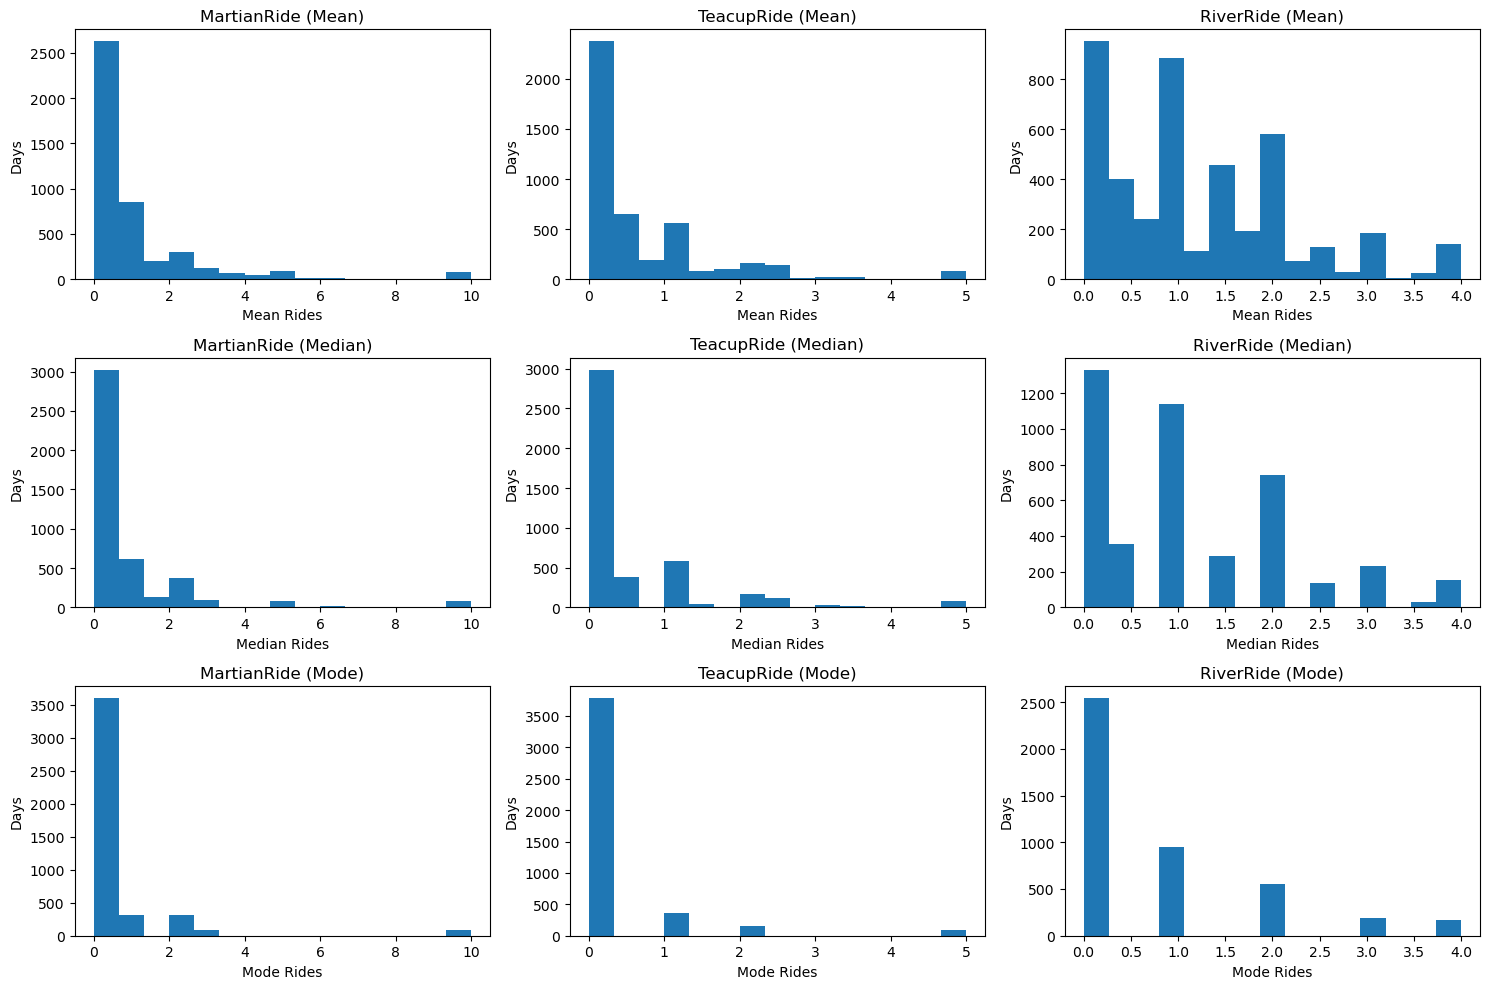

In [29]:
import matplotlib.pyplot as plt

# Extract statistics
daily_means = daily_summary.xs("mean", level=1, axis=1)
daily_medians = daily_summary.xs("median", level=1, axis=1)
daily_modes = daily_summary.xs("<lambda_0>", level=1, axis=1)

# Create 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# ---- Row 1: Means ----
for i, ride in enumerate(ride_cols):
    axes[0, i].hist(daily_means[ride], bins=15)
    axes[0, i].set_title(f"{ride} (Mean)")
    axes[0, i].set_xlabel("Mean Rides")
    axes[0, i].set_ylabel("Days")

# ---- Row 2: Medians ----
for i, ride in enumerate(ride_cols):
    axes[1, i].hist(daily_medians[ride], bins=15)
    axes[1, i].set_title(f"{ride} (Median)")
    axes[1, i].set_xlabel("Median Rides")
    axes[1, i].set_ylabel("Days")

# ---- Row 3: Modes ----
for i, ride in enumerate(ride_cols):
    axes[2, i].hist(daily_modes[ride], bins=15)
    axes[2, i].set_title(f"{ride} (Mode)")
    axes[2, i].set_xlabel("Mode Rides")
    axes[2, i].set_ylabel("Days")

plt.tight_layout()
plt.show()


3. Find the standard deviation and variance of the count for each ride.

Suggested Google search or ChatGPT prompt: "How do I find the standard deviation of a Series in pandas documentation?" and similar query for variance.

I included the word "documentation" because this task likely involves applying one single function for standard deviation and another for variance, so I expected that I could find a single documentation page for each that would cover my needs.  I get these:

https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.var.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html

In [30]:
ride_std = df[ride_cols].std()
print("Standard Deviation:")
print(ride_std)

ride_var = df[ride_cols].var()
print("\nVariance:")
print(ride_var)



Standard Deviation:
MartianRide    2.077339
TeacupRide     1.232851
RiverRide      1.295757
dtype: float64

Variance:
MartianRide    4.315338
TeacupRide     1.519922
RiverRide      1.678987
dtype: float64


4. Find the 90th percentile count for each ride.  That is, if the customers are ordered by their number of rides, and there are 100 customers, how many rides does the 90th person take?  There is a function in pandas that easily does this calculation.

Suggested Google search or ChatGPT prompt: "How do I find a percentile value for a Series in pandas documentation?"

This time, I will let you find the page!  Hint: it's not actually called the "percentile" function.

In [31]:
ride_90th = df[ride_cols].quantile(0.90)

print("90th Percentile Ride Counts:")
print(ride_90th)



90th Percentile Ride Counts:
MartianRide    2.0
TeacupRide     2.0
RiverRide      3.0
Name: 0.9, dtype: float64


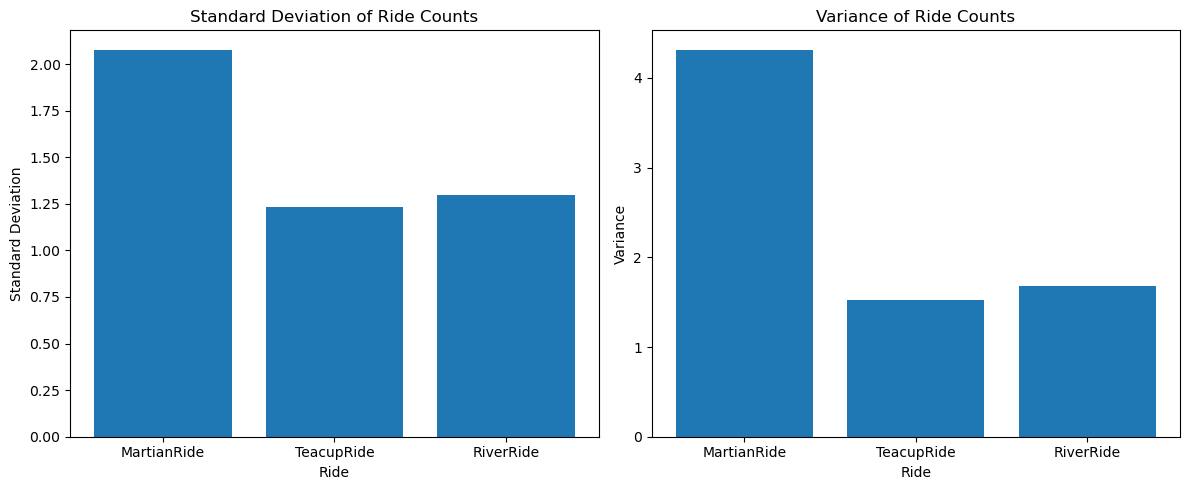

In [32]:
import matplotlib.pyplot as plt

# Calculate
ride_std = df[ride_cols].std()
ride_var = df[ride_cols].var()

# Create figure with 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Standard Deviation Plot ----
axes[0].bar(ride_std.index, ride_std.values)
axes[0].set_title("Standard Deviation of Ride Counts")
axes[0].set_ylabel("Standard Deviation")
axes[0].set_xlabel("Ride")

# ---- Variance Plot ----
axes[1].bar(ride_var.index, ride_var.values)
axes[1].set_title("Variance of Ride Counts")
axes[1].set_ylabel("Variance")
axes[1].set_xlabel("Ride")

plt.tight_layout()
plt.show()


5. Plot a histogram of the ride count, using each day as data element as you did in #2.  Use both the total ride count for each day as well as, separately, the mean ride count for each day.

Suggested Google search or ChatGPT prompt: "How do I plot a histogram for a Series in pandas?"

I found this: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html

Note: the "by" keyword will not help you plot a count for each day; if you try to use it for this, it will try to draw a separate histogram for each day.

You've already learned how to find the mean ride count for each day.  Can you use a similar idea to find the total ride count for each day?

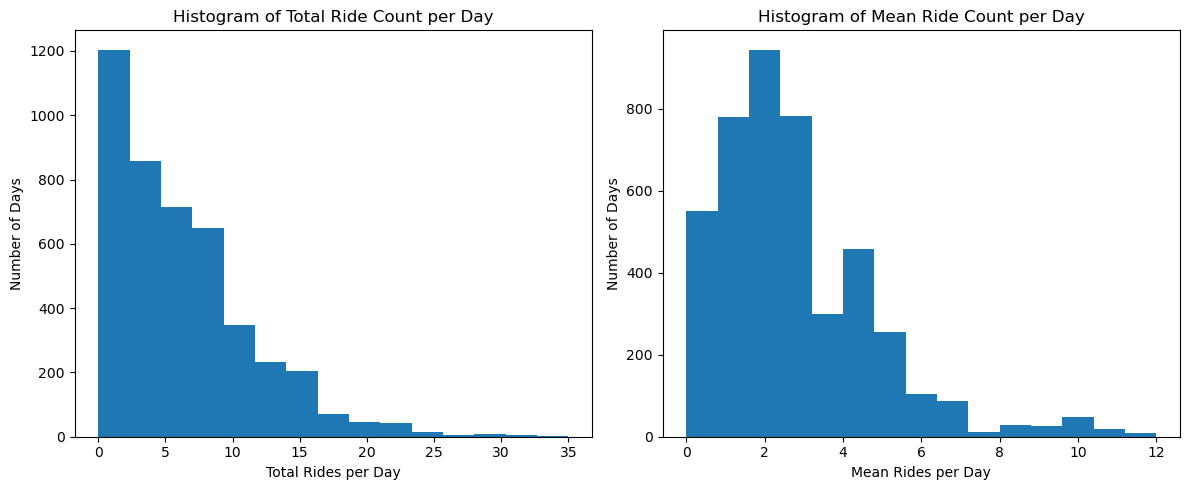

In [33]:
# Total rides per visitor
df["TotalRides"] = df[ride_cols].sum(axis=1)

# Total rides per day
daily_total = df.groupby("VisitDate")["TotalRides"].sum()

# Mean rides per day
daily_mean = df.groupby("VisitDate")["TotalRides"].mean()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of total rides per day
axes[0].hist(daily_total, bins=15)
axes[0].set_title("Histogram of Total Ride Count per Day")
axes[0].set_xlabel("Total Rides per Day")
axes[0].set_ylabel("Number of Days")

# Histogram of mean rides per day
axes[1].hist(daily_mean, bins=15)
axes[1].set_title("Histogram of Mean Ride Count per Day")
axes[1].set_xlabel("Mean Rides per Day")
axes[1].set_ylabel("Number of Days")

plt.tight_layout()
plt.show()

6. Make a bar chart showing the total number of Adult and Child participants.

Try to formulate your own Google search or ChatGPT prompt.

Here's one page I found:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

which shows some interesting examples for you to use.  I recommend clicking on the first, basic example to see how to use the function.

You can also look up the pandas documentation, which might lead to an entirely different method.

True     6625
False    3375
Name: IsAdult, dtype: int64


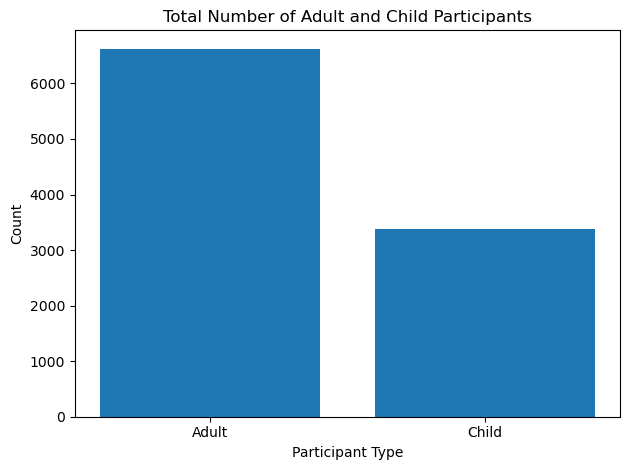

In [34]:
import matplotlib.pyplot as plt

# Count participants
counts = df["IsAdult"].value_counts()

print(counts)

plt.figure()

plt.bar(["Adult", "Child"], 
        [counts.get(True, 0), counts.get(False, 0)])

plt.title("Total Number of Adult and Child Participants")
plt.xlabel("Participant Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

7. Make a stacked bar chart showing how many Adult and Child visits took the River Ride, with the x-axis showing the number of rides and with two stacked bars (adult, child).  That is, there could be a column for the number of Adults (and Children) who took 0 rides, 1 ride, 2 rides, and so on.

Try to formulate your own Google search or ChatGPT prompt.

For me, the pandas documentation was easier than the matplotlib documentation.

* If you use the pandas method, you might have to one-hot encode the IsAdult column.  You might want names for the new columns other than True and False.  Use df.join or pd.concat to attach the pd.get_dummies table you've created, and then groupby the RiverRide value.

* You will need to end up with a small table with two columns (IsAdult True and False) and an index (RiverRide) as well as a small number of rows (the values of RiverRide)

* That said, if you can come up with another approach, it's fine.

Group,Adult,Child
RiverRide,,
0,4118,0
1,1498,841
2,1009,844
3,0,798
4,0,892


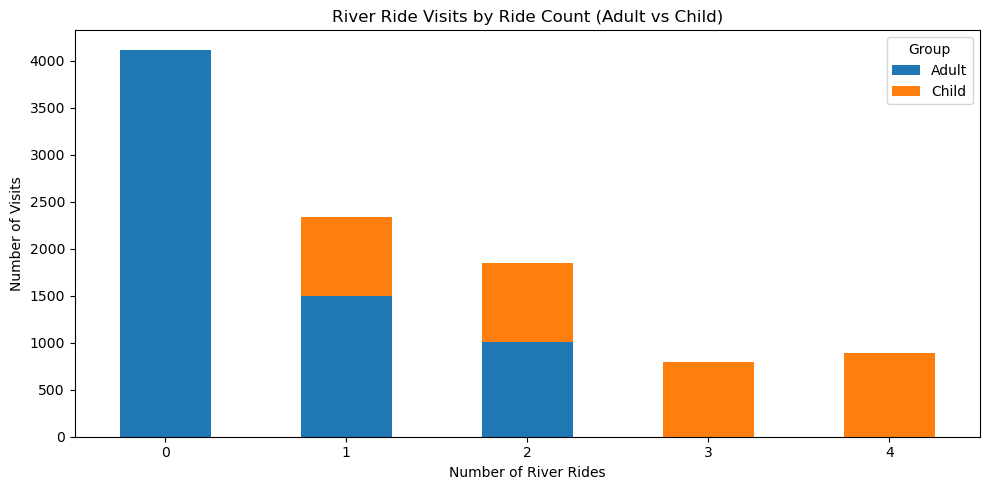

In [35]:


# Convert True/False to readable labels
df["Group"] = df["IsAdult"].map({True: "Adult", False: "Child"})

# Create frequency table
river_table = pd.crosstab(df["RiverRide"], df["Group"])

display(river_table)

# Plot stacked bar chart
river_table.plot(kind="bar", stacked=True, figsize=(10, 5))

plt.title("River Ride Visits by Ride Count (Adult vs Child)")
plt.xlabel("Number of River Rides")
plt.ylabel("Number of Visits")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


8. Other tasks

Use seaborn (import seaborn as sns) to create a kernel density estimation (kde) plot.  (You can choose any aspect of the amusement park dataset to plot.)  Here is a tutorial you can read about seaborn:

https://seaborn.pydata.org/tutorial/introduction.html

Seaborn often makes nicer looking graphs than pandas or matplotlib.

Now use seaborn to make a swarm plot, a violin plot, and a box plot.

Which plots are the best for showing this data?

the box plot communicates the difference between Adults and Children immediately. Children have higher median total rides.


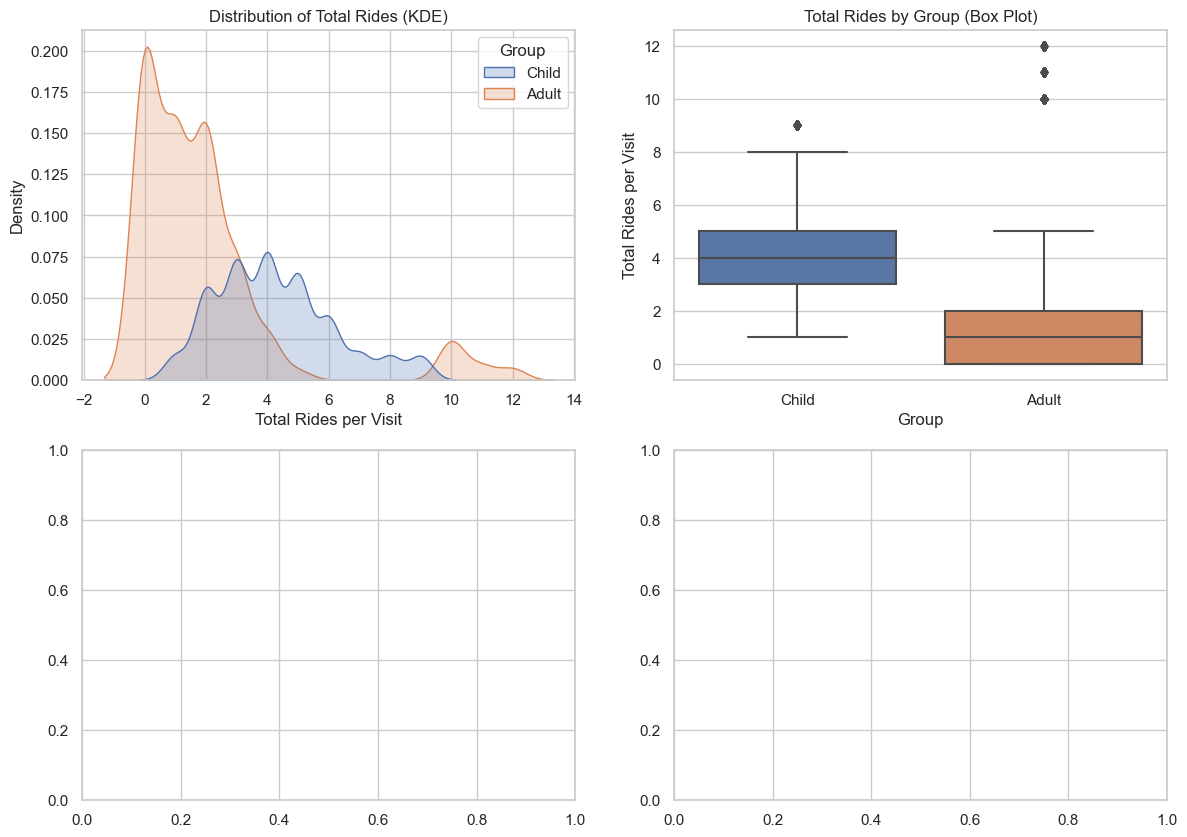

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn theme for cleaner visuals
sns.set_theme(style="whitegrid")

# Create TotalRides column
ride_cols = ["MartianRide", "TeacupRide", "RiverRide"]
df["TotalRides"] = df[ride_cols].sum(axis=1)

# Improve group labels
df["Group"] = df["IsAdult"].map({True: "Adult", False: "Child"})

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ---- KDE Plot ----
sns.kdeplot(data=df, x="TotalRides", hue="Group", fill=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Total Rides (KDE)")
axes[0, 0].set_xlabel("Total Rides per Visit")
axes[0, 0].set_ylabel("Density")

# ---- Box Plot ----
sns.boxplot(data=df, x="Group", y="TotalRides", ax=axes[0, 1])
axes[0, 1].set_title("Total Rides by Group (Box Plot)")
axes[0, 1].set_xlabel("Group")
axes[0, 1].set_ylabel("Total Rides per Visit")


# ---- Violin Plot ----
print("the box plot communicates the difference between Adults and Children immediately. Children have higher median total rides.")


# 4. Storytelling With Data graph

Try to make a scatterplot using amusement park dataset that is similar to the one on page 45, where the two axes are the Teacup Ride count and the River Ride count.  If you want to see individual dots and not a dense swarm of dots, you'll have to cut the dataset down to a small number of points (say, 100 points or so).  You can remove the other points, for instance, and focus on the first 100 points.

Here are some things you could do (you don't have to do all of them):

* Draw a dashed line that roughly separates the adult from child points.

* Draw the points in the adult vs. child region of the graph in different colors.

* Choose the right size and number of dots to make the graph look good.

* Write a word that appears on the dashed line (like AVG in the plot on page 45).

If there are any other graphs in the Storytelling With Data chapter that look interesting, and you want more practice, you can try to reproduce them too.

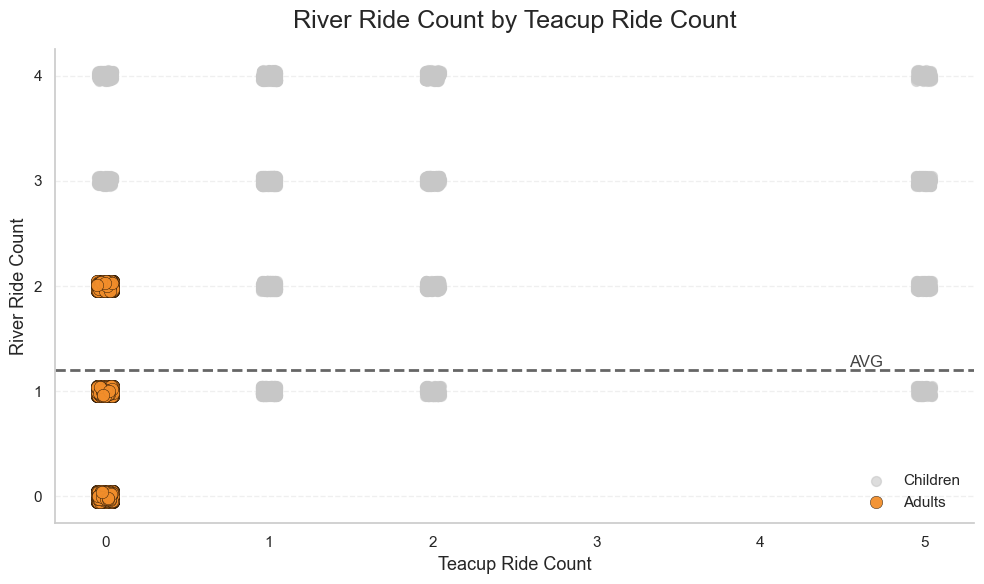

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Full dataset
x = df["TeacupRide"].values
y = df["RiverRide"].values
is_adult = df["IsAdult"].values

# Add very small jitter ONLY for visual clarity
x_jitter = x + np.random.uniform(-0.05, 0.05, len(x))
y_jitter = y + np.random.uniform(-0.05, 0.05, len(y))

avg_river = y.mean()

plt.figure(figsize=(10, 6))
ax = plt.gca()

# Children (background)
plt.scatter(x_jitter[~is_adult], y_jitter[~is_adult],
            color="#c7c7c7", s=50, alpha=0.6, label="Children")

# Adults (highlighted)
plt.scatter(x_jitter[is_adult], y_jitter[is_adult],
            color="#f28e2b", s=80, alpha=0.95,
            edgecolor="black", linewidth=0.3, label="Adults")

# Horizontal average line
plt.axhline(avg_river, linestyle="--", color="#666666", linewidth=2)

# AVG label
plt.text(max(x) * 0.95, avg_river,
         "AVG",
         ha="right", va="bottom",
         fontsize=12, color="#444444")

# Titles
plt.title("River Ride Count by Teacup Ride Count", fontsize=18, pad=15)
plt.xlabel("Teacup Ride Count", fontsize=13)
plt.ylabel("River Ride Count", fontsize=13)

# Keep axis ticks as clean integers
plt.xticks(range(int(min(x)), int(max(x)) + 1))
plt.yticks(range(int(min(y)), int(max(y)) + 1))

# Clean book-style formatting
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(True, linestyle="--", alpha=0.3)
ax.xaxis.grid(False)

plt.legend(frameon=False)
plt.tight_layout()
plt.show()
